## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [141]:
import pandas as pd#Importing libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)
import statsmodels.api as sm

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [142]:
#Loading data and displaying the first 5 rows
df = pd.read_csv('ab_data.csv')
df.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

b. Use the cell below to find the number of rows in the dataset.

In [143]:
#Displaying the number of rows and columns
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [144]:
#Displaying the number of unique users
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [145]:
#Calculating the proportion of users converted
df.query('converted == 1')['user_id'].nunique()/df['user_id'].nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [146]:
#Calculating the number of times the new_page and treatment don't line up
df.query('(landing_page == "new_page" and group != "treatment") | (landing_page == "old_page" and group != "control" )')['timestamp'].count()

3893

f. Do any of the rows have missing values?

In [147]:
#Checking the missing values in the dataset
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [148]:
#Creating df2 
df2 = df.query('(group == "treatment" and landing_page == "new_page") | (group == "control" and landing_page == "old_page")')
df2.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

In [149]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [150]:
#Calculating the number of unique user_ids in df2
df['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [151]:
#Identifying the dulplicated user_id
df2_duplicate=df2[df2['user_id'].duplicated()==True]
df2_duplicate

user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

c. What is the row information for the repeat **user_id**? 

In [152]:
# Displaying the dulplicated user_id info
df2.query('user_id == "773192"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 1899 to 2893
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       2 non-null      int64 
 1   timestamp     2 non-null      object
 2   group         2 non-null      object
 3   landing_page  2 non-null      object
 4   converted     2 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 96.0+ bytes


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [153]:
# Before removing this dulicated user ID, let's display its duplicated rows
df2.query('user_id == "773192"')

user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

In [154]:
# Dropping row # 2893 and confirming results
df2.drop([2893],axis=0,inplace =True)
df2.query('user_id == "773192"')

C:\Users\sherif\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [155]:
#Calculating the probability of an individual converting regardless of the page they receive
df2[df2['converted']==1].shape[0]/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [156]:
#Calculating the probability of an individual converting in the control group
df2[(df2['converted']==1) & (df2['group']=='control')].shape[0]/(df2[df2['group']=='control'].shape[0])

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [157]:
#Calculating the probability of an individual converting in the treatment group
df2[(df2['converted']==1) & (df2['group']=='treatment')].shape[0]/(df2[df2['group']=='treatment'].shape[0])

0.11880806551510564

d. What is the probability that an individual received the new page?

In [158]:
df2[(df2['landing_page']=='new_page')].shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer:**

**Based on our analysis, we have calculated the following probability statistics:**
1. The probability of an individual converting regardless of the page type is 11.96%.
2. The probability that an individual in the control group will convert is 12.04%.
3. The probability that an individual in the treatment group will convert is 11.88%.
4. The probability that an individual receives the new page is 50%.
5. The difference in conversion probability in both control and treatment groups is 0.16% (12.04% - 11.88%).


* Accordingly, we can conclude that data is fairly distributed between the control and treatment groups with 50% probability of page receipt for each group. However, although the probability of an individual to be converted is little a bit higher in the control group than in the treatment group, the difference in conversion is very low (0.16%), which statistically and practically isn't a significant evidence that the new treatment page leads to more conversions. This difference may be attributed to the change aversion of the website existing users. Finally, we can support our conclusion, that there is no sufficient evidence that the new treatment page leads to more conversions, with the fact that the mean probability that users converted in both control and treatment group are almost close or even identical to the probability of an individual converting regardless of the page they receive (12.04 + 11.88/2 = 11.96%).


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer:**

**$H_{0}:$** **$p_{new}$** **$-$** **$p_{old}$** **$<=$** 0

**$H_{1}:$** **$p_{new}$** **$-$** **$p_{old}$** **$>$** 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [159]:
#Calculating the convert rate of new page under the null
df_new = df2.query('group =="treatment"')
p_new = df2.query('converted == 1').user_id.nunique()/df2.user_id.nunique()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [160]:
#Calculating the convert rate of old page under the null
df_old = df2.query('group =="control"')
p_old = df2.query('converted == 1').user_id.nunique()/df2.user_id.nunique()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [161]:
#Calculating the number of users receive the new page
n_new = df_new.user_id.nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [162]:
#Calculating the number of users receive the old page
n_old = df_old.user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [163]:
#Simulating the new page transactions with the convert rate the new page
new_page_converted = np.random.binomial(1,p_new,n_new)
new_page_converted
np.unique(new_page_converted)

array([0, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [164]:
#Simulating the old page transactions with the convert rate the old page
old_page_converted = np.random.binomial(1,p_old,n_old)
old_page_converted
np.unique(old_page_converted)

array([0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [165]:
#Calculating the observed mean
observed_diff = new_page_converted.mean() - old_page_converted.mean()
observed_diff

0.002179422373047038

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [166]:
# Simulating sampling distribution of 10,000 values size
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

p_diffs = np.asarray(p_diffs)
p_diffs

array([-0.00123392,  0.00095447,  0.00045205, ..., -0.00060787,
       -0.00048403, -0.00100001])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

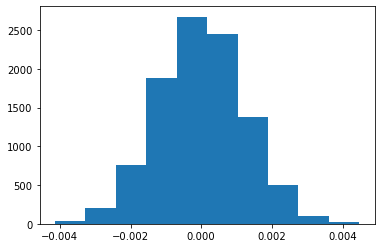

In [167]:
#Plotting the p_diffs
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [168]:
# Calculate the observed difference in conversion means of both control and treatment groups
observed_diff = df2[df2['group'] == "treatment"].converted.mean() - df2[df2['group'] == "control"].converted.mean()
observed_diff

-0.0015782389853555567

In [169]:
# Calculating the upper and lower bounds of the sampling distribution with a Type I error rate of 5% and confidence level of 95%
lower, upper = np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5)
lower, upper

(-0.002397416685777639, 0.0024206373991012397)

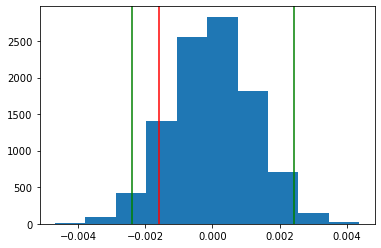

In [170]:
# Simulating from the null hypothesis
null_vals = np.random.normal(0, np.std(p_diffs), np.array(p_diffs).size)

#Plot Null distribution
plt.hist(null_vals)

#Plot vertical line for observed statistic
plt.axvline(x=observed_diff,color ='red');
plt.axvline(lower,color="green")
plt.axvline(upper,color="green");

In [171]:
#Calculating the P-value to identify check if we will reject or fail to reject the null
(null_vals > observed_diff).mean()

0.9022

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**
In part J, we simulated from the null to test whether 𝐻0 or 𝐻1 is True. With a probability of committing a Type I error rate of 5% (α), we tested the Null hypothesis to verify if it is actually true as we believe (the new page is less than or equal to the old page in conversion), or the Alternative is true as we would like to prove (the new page is less than or equal to the old page in conversion).

We have found that the P-value simulated from the Null is estimated to ~ 0.9 and is also greater than the observed difference of conversion means in both the control and treatment groups. Most importan, the P-value is > the α rate (the probability of committing a Type I error).

**Statistically, if the P-value is greater than the α rate (the probability of committing a Type I error), we can conclude that we failed to reject null hypothesis as it is more likely our statistic comes from the Null hypothesis, not from the Alternative hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [172]:
import statsmodels.api as sm
# Filtering df2 to provide the required info
convert_old = df2[(df2['landing_page'] == "old_page") & (df2['converted'] == 1)].shape[0]
convert_new = df2[(df2['landing_page'] == "new_page") & (df2['converted'] == 1)].shape[0]
n_old = df2[df2['landing_page'] == "old_page"].shape[0]
n_new = df2[df2['landing_page'] == "new_page"].shape[0]

#Printing conversion results
print('Number of Conversions of the Old Page: {}'.format(convert_old))
print('Number of Conversions of the New Page: {}'.format(convert_new))
print('number of individuals who received the Old Page: {}'.format(n_old))
print('number of individuals who received the New Page: {}'.format(n_new))

Number of Conversions of the Old Page: 17489
Number of Conversions of the New Page: 17264
number of individuals who received the Old Page: 145274
number of individuals who received the New Page: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [173]:
#Calculating the z-score and p-value to check hypothesis testing
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],
                   value=None, alternative='smaller', prop_var=False)
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:**

* Again, **we failed to reject null hypothesis**. From the z-score test output, the **z-score test statisic is 1.3 which considers very small** and the **corresponding P-value is ~0.9 which is greater than α rate of 5%**. We do not have sufficient evidence to say that the proportion of converstions from the old page are statistically significant than the new page.

* Only If the p-value that corresponds to the z-test statistic is less than the chosen significance level,then we can reject the null hypothesis.

* Finally, **the findings in parts j. and k. are quite the same**.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:**

* The regression model that fits this case is **Logistic Regression** as the type of variables used is categorical(converted or not_converted). 

**Logistic Regression** is used to predict the response variable based on categorical explanatory variables, with only 2 possible outcomes and a probability between 0 and 1.


b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [174]:
#Displaying df2 existing columns before adding the new required columns
df2.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [175]:
#create a column for the intercept
df2['intercept'] = 1
#create a dummy variable column for each page received
df2 = df2.join(pd.get_dummies(df2['landing_page']))
#Create ab_page column, where 1 means an individual receives the treatment and 0 if control is received.
df2['ab_page'] = df2['landing_page'].apply(lambda x: 1 if x == 'new_page' else 0)

<ipython-input-175-70b746a6ba0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['intercept'] = 1


In [176]:
# Confirming addition of new columns
df2.head()

user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  new_page  old_page  ab_page  
0          1         0         1        0  
1          1         0         1        0  
2          1         1         0        1  
3          1         1         0        1  
4          1         0         1        0

In [177]:
#Building Logit regression model to predict conveted variable based on ab_page with control as baseline
#Fitting the Logit regression model based on conveted and ab_page variables
df2['intercept'] = 1
logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [178]:
# Displaying the Logistic regression model results for converted as a response variable, 
#ab page as an explanatory variable, and old page as a baseline
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 03 Jun 2021   Pseudo R-squ.:               8.077e-06
Time:                        22:31:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [179]:
#Exponentiating the coefficients to help inteprete the results
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer:**

* Regression tests the correlation of response variable and other independent variables. We can draw a conclusion about the impact of variables on the response variable by looking at the P-value. In regression, P-value closer to 0 means that the variable tested has a statistical significance to the response variable. In our case, since ab_page variable has a P-value of 0.190, which is > 0, it is statistically non-significant related to conversion.

* From the model, we can say that for every one unit increase in ab_page, the conversion rate is 0.985 times as likely as the old page, holding other variables constant, which is again proves that the old page converts more than the new one. 

* The hypothesis testing can be setup as follows:

𝐻0: 𝑝𝑛𝑒𝑤 − 𝑝𝑜𝑙𝑑 = 0

𝐻1: 𝑝𝑛𝑒𝑤 − 𝑝𝑜𝑙𝑑 != 0

* From the model, p-value for old page is 0.0 which is statistically significant in relating to the response variable compared to 0.190 p-value for the new or ab page which is not statistically significant in relating to the response variable

**Part II results (A/B test) differ from the Logistic Regression results in that:**

* A/B test proves that the Null Hypothesis is true (the new page is less than or equal to the new page in conversion while the regression model proves that the Alternative Hypothesis is true (the old page is better than the new ab page). In A/B test, if P-value > Alpha value, the Null is true. However, in regression, if P-value != 0, the Alternative is true.

* Additionally, we have performed a one-tailed test in Part 2. In A/B test, the significance level of .05 is alloted to testing the statistical significance in one direction/tail of the distribution of the test statistic, resulting in a P-value > the α rate of 0.05. As a result, we can conclude that we failed to reject null hypothesis as it is more likely our statistic comes from the Null hypothesis, not from the Alternative hypothesis. 

* On the other hand, we have performed a two-tailed test in Part 3. In regression, the significance level is alloted half of the alpha to testing the statistical significance in one direction and half of the same alpha to testing statistical significance in the other direction, resulting in a P-value > 0. As a result, we can conclude that we reject null hypothesis and fail to reject the Alternative hypothesis as the ab(new) page has a P-value > 0.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**

From the dataset, one variable that might influence users' conversion is timestamp. This variable can inform us more about the timing of best conversion rates. Another variable can be users ‘countries that might inform us more about which countries yield more conversion rates.

However, adding many additional variables, unless justified with objective needs, into our regression model can create complexity in interpreting the model output. Additionally, it can lead to one or more of the potential regression problems below:

1.	Non-linearity of the response-predictor relationships
2.	Correlation of error terms
3.	Non-constant Variance and Normally Distributed Errors
4.	Outliers/ High leverage points
5.	Multicollinearity

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [180]:
#Reading countries.csv file and merging it into df2 dataframe
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [181]:
#Confirming merging is done correctly
df_new.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  new_page  old_page  ab_page  
user_id                                                     
834778           0          1         0         1        0  
928468           0          1         1         0        1  
822059           1          1         1         0        1  
711597           0          1         0         1        0  
710616           0          1         1         0        1

In [182]:
#Confirming that country column has equal # of observations similar to others without missing values
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 834778 to 934996
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   country       290584 non-null  object
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
 5   intercept     290584 non-null  int64 
 6   new_page      290584 non-null  uint8 
 7   old_page      290584 non-null  uint8 
 8   ab_page       290584 non-null  int64 
dtypes: int64(3), object(4), uint8(2)
memory usage: 18.3+ MB


In [183]:
#Identifying the unique countries in the country column
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [184]:
#Creating the necessary dummy variables for countries
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])

In [185]:
#Creating interaction variables between new page and countries CA, US and UK to improve and best fit our model
df_new['CA_ab_page'] = df_new['ab_page'] * df_new['CA']
df_new['UK_ab_page'] = df_new['ab_page'] * df_new['UK']
df_new['US_ab_page'] = df_new['ab_page'] * df_new['US']

In [186]:
#Confirm the necessary dummy variables have been created
df_new.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  new_page  old_page  ab_page  CA  UK  US  \
user_id                                                                  
834778           0          1         0         1        0   0   1   0   
928468           0          1         1         0        1   0   0   1   
822059           1          1         1         0        1   0   1   0   
711597           0          1         0         1        0   0   1   0   
710616           0          1         1         0        1   0   1   0   

         CA_ab_page  UK_ab_page  US_ab_page  
user_id                                      
834778            0           0           0  
928468            0           0           1  
822059            0           1           0  
711597            0           0           0  
710616            0           1           0

In [187]:
#Create intercept variable
df_new['intercept'] = 1

"""
Create Logit regression model for converted as response variable while UK, US
as explanatory variableS, and old page and CA as baselines
"""

logit_mod_page = sm.Logit(df_new['converted'], df_new[['intercept','UK', 'US']])

results = logit_mod_page.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 03 Jun 2021   Pseudo R-squ.:               1.521e-05
Time:                        22:31:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

In [188]:
#Exponentiate the coefficients to help inteprete the results
np.exp(results.params)

intercept    0.130350
UK           1.052027
US           1.041647
dtype: float64

## Results Interpretation:
    
**From the Logistic Regression model, we can conclude that:**
* The UK and US variables are not statistically significant in relation to conversion as their P-values are equal to a value > 0. This means that countries have no imapct on conversion rate.
* In UK, Conversion rate is 1.052 times as likely as in CA, holding all other variables constant.
* In US, Conversion rate is 1.042 times as likely as in CA, holding all other variables constant.


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [189]:
#Create intercept variable
df_new['intercept'] = 1

"""
Create Logit regression model for converted as response variable while new_page,UK, US , UK_ab_page , US_ab_page
as explanatory variableS, and old page, CA and CA_ab_page as baselines
"""

logit_mod_page = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','UK', 'US', 'UK_ab_page','US_ab_page']])

results = logit_mod_page.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 03 Jun 2021   Pseudo R-squ.:               3.482e-05
Time:                        22:32:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

In [190]:
#Exponentiate the coefficients to help inteprete the results
np.exp(results.params)

intercept     0.134794
ab_page       0.934776
UK            1.011854
US            1.017682
UK_ab_page    1.081428
US_ab_page    1.048001
dtype: float64

## Results Summary and Interpretation:
    
**From the Logistic Regression model, we can conclude that:**
* The ab (new) page, UK, US, UK ab page and US ab page variables are not statistically significant in relation to conversion as their P-values are equal to a value > 0.
* For every unit increase for an individual to receive the ab/new page, the conversion rate is 0.935 times as likely as the old page, holding all other variables constant. 
* In UK, Conversion rate is 1.012 times as likely as in CA, holding all other variables constant.
* In US, Conversion rate is 1.018 times as likely as in CA, holding all other variables constant.
* In UK, for every unit increase for an individual to receive the ab/new page, the conversion rate is 1.08 times as likely as the old page in CA, holding all other variables constant. 
* In US, for every unit increase for an individual to receive the ab/new page, the conversion rate is 1.05 times as likely as the old page in CA, holding all other variables constant.


## Conclusion
From both regression models and A/B test, we can conclude that:

**1. For countries, we have an evidence that:**
* Statistically, there is no impact on conversion rate as countries were proved to have no statistical significance on conversion. This fact is supported by the P-value results that are greater than 0 for each country.

* Practically, there is an impact of UK and US on conversion compared to CA, holding all other variables constant. In case an individual receives both the new and old pages, UK conversion rate is higher than CA by 5.2% and that of US is higher than CA by 4.2%. However, in case an individual only receives the new page, UK conversion rate is higher than CA by 12% and that of US is higher than CA by 18%.

**2. For the type of page with higher conversion rate, we have an evidence that:**

* Statistically, the old page was proved, from both the A/B test and z-test, to have a higher conversion rate than the new page with a corresponding P-value estimated to ~0.9, which is greater than the used significance level of 0.05.

* Moreover, from the Logistic regression model, for every one unit increase in the new page, the conversion rate is 0.935 times as likely as the old page, holding all other variables constant, which is again proves that the old page converts more than the new one.

* Practically, there is no significant difference in conversion rate between the old page and the new page as the observed difference in means is estimated to 0.0016. Additionally, considering other factors such novelty effect and change aversion, the experiment might include existing users who would bias results in a short timeframe and if the experiment could run long enough and gain more traffic to allow existing users to adjust to the change, the new page may generate a higher conversion rate than the old one.


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [193]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1